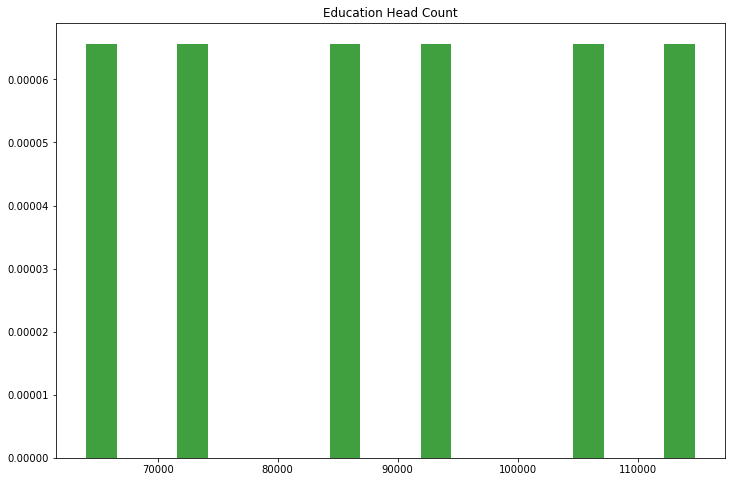

In [5]:
import pandas as pd
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
client = MongoClient()
db = client.test
collection = db['EducationHeadCount']
cursor = list(collection.find({}, {'_id': False}))
bins = []
for meanData in cursor:
    bins.append(meanData["Mean_english_regions"])
x = [64025, 74161, 84408, 94330, 104763, 114781]

fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 8))

ax0.hist(x, 20, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('Education Head Count')
plt.show()